In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline

data_dir = '/Users/SY/Desktop/obic/data/'

In [2]:
#read as pandas hhhhh
import pandas as pd
starcatalog_fram = pd.read_csv(data_dir + 'lamost_sdss.csv')
#starcatlog_fram = starcatlog_fram.ix[:,:517]
#print(starcatlog_fram['TEFF_1'].values)

In [3]:
#change logTeff into Teff.
#add [Teff] into DATAFRAME

# def tenn(x):
#     y=10 ** x
#     return y

# Teff_tbl = MS2017_fram['logTeff'].apply(tenn)

#data_fram = starcatalog_fram[['TEFF_1','ERR_TEFF_1','Jmag_1','e_Jmag_1','Hmag_1','e_Hmag_1']]
#print(data_fram)

starcatalog_fram_fil = starcatalog_fram.fillna(0)

print(starcatalog_fram_fil)

#yeah!!!!!


                                SPEC_ID      DATE               PLATE  SP_ID  \
0            20110922-PM1M_keda1-04-006  20110922          PM1M_keda1      4   
1            20110922-PM1M_keda1-04-010  20110922          PM1M_keda1      4   
2            20110922-PM1M_keda1-04-019  20110922          PM1M_keda1      4   
3            20110922-PM1M_keda1-04-020  20110922          PM1M_keda1      4   
4            20110922-PM1M_keda1-04-021  20110922          PM1M_keda1      4   
5            20110922-PM1M_keda1-04-050  20110922          PM1M_keda1      4   
6            20110922-PM1M_keda1-04-058  20110922          PM1M_keda1      4   
7            20110922-PM1M_keda1-04-061  20110922          PM1M_keda1      4   
8            20110922-PM1M_keda1-04-107  20110922          PM1M_keda1      4   
9            20110922-PM1M_keda1-04-131  20110922          PM1M_keda1      4   
10           20110922-PM1M_keda1-04-136  20110922          PM1M_keda1      4   
11           20110922-PM1M_keda1-04-138 

In [79]:
teff = 'TEFF'
cc1 = 'r' ; cc2 = 'i'
color1 = 'rmag'
color2 = 'imag'
err_teff = 'ERR_TEFF'
err_c1 = 'e_' + color1
err_c2 = 'e_' + color2

In [80]:
ylabel = '$r-i$'
savename = '2018_3_6_ri.png'

In [81]:
# # judge GRI data
# starcatalog_fram_fil=starcatalog_fram_fil[((starcatalog_fram_fil[err_c1] != 0) \
#                                           & (starcatalog_fram_fil[err_c2] != 0))\
#                                          & ((starcatalog_fram_fil[color1] != 0)\
#                                            | (starcatalog_fram_fil[color2] != 0))]
                                        
    

In [82]:
# judge  data
starcatalog_fram_fil=starcatalog_fram_fil[((starcatalog_fram_fil[err_c1] != 0) \
                                          & (starcatalog_fram_fil[err_c2] != 0)\
                                          & (starcatalog_fram_fil[err_c1] != -99) \
                                          & (starcatalog_fram_fil[err_c2] != -99)\
                                          & (starcatalog_fram_fil[color1] != -99)\
                                          & (starcatalog_fram_fil[color2] != -99))\
                                         & ((starcatalog_fram_fil[color1] != 0)\
                                           | (starcatalog_fram_fil[color2] != 0))
                                         &((starcatalog_fram_fil[err_c1] <=0.05)\
                                          & (starcatalog_fram_fil[err_c2] <=0.05))]
# starcatalog_fram_fil=starcatalog_fram_fil[(starcatalog_fram_fil[err_c1] <=0.2)\
#                                            &(starcatalog_fram_fil[err_c2] <=0.05)]

print(starcatalog_fram_fil.iloc[:,0].size)
                                        

789


In [83]:
#filt the good one
#apogee_tbl_fil = apogee_tbl[np.argwhere(np.logical_and(apogee_tbl['teff'] > 0, apogee_tbl['logg'] > -3))]
#apogee_tbl_fil = apogee_tbl_fil[np.argwhere(np.logical_and(apogee_tbl_fil['j'].flatten() > -1, \
#                                                           apogee_tbl_fil['h'].flatten() > -1))]
#USE goodOB 


starcatalog_fram_fil=starcatalog_fram_fil[(starcatalog_fram_fil[color1]> -1) \
                                          & (starcatalog_fram_fil[color2]> -1) \
                                         & (starcatalog_fram_fil[err_teff] != 0 )\
                                          & (starcatalog_fram_fil[err_teff]< 1000)]
print(starcatalog_fram_fil)

                                SPEC_ID      DATE               PLATE  SP_ID  \
0            20110922-PM1M_keda1-04-006  20110922          PM1M_keda1      4   
1            20110922-PM1M_keda1-04-010  20110922          PM1M_keda1      4   
2            20110922-PM1M_keda1-04-019  20110922          PM1M_keda1      4   
3            20110922-PM1M_keda1-04-020  20110922          PM1M_keda1      4   
4            20110922-PM1M_keda1-04-021  20110922          PM1M_keda1      4   
5            20110922-PM1M_keda1-04-050  20110922          PM1M_keda1      4   
6            20110922-PM1M_keda1-04-058  20110922          PM1M_keda1      4   
7            20110922-PM1M_keda1-04-061  20110922          PM1M_keda1      4   
8            20110922-PM1M_keda1-04-107  20110922          PM1M_keda1      4   
9            20110922-PM1M_keda1-04-131  20110922          PM1M_keda1      4   
10           20110922-PM1M_keda1-04-136  20110922          PM1M_keda1      4   
11           20110922-PM1M_keda1-04-138 

In [84]:
# Determine the input numbers.

# Bin width, usually 50 (for more scatter, try 1000 or other figures)
bin_width = 1000
# Ratio of the bluest edge, usually 5%
ratio = 5
# Low end criteria. If the number in a bin is lower than this number then neglect.  
low_crit = 100

In [85]:
# input the data of Bessell. M.S. & Brett. J.M. 1988
# BBFrame is the dataframe of the ic data 

#BBFrame=pd.DataFrame({'J-H':[-0.1,-0.09],'Teff':[25600,22300]})


In [86]:
# Find the start point and bin number of Teff. 
# Start point: the first number divisible by bin_width smaller than min(teff)
# Bin number: Start from start point and cover all the teff range.


#teff_start = min(apogee_tbl_fil['teff']) - min(apogee_tbl_fil['teff']) % (bin_width/2)
#bin_number = math.ceil((max(apogee_tbl_fil['teff']) - teff_start) / bin_width)

teff_start = min(starcatalog_fram_fil[teff])-min(starcatalog_fram_fil[teff])%(bin_width / 2)
bin_number = math.ceil((max(starcatalog_fram_fil[teff])-teff_start) / bin_width)


In [87]:
#filt BBFrame
#BBFrame_fil=BBFrame[BBFrame['Teff'] > teff_start]

In [88]:
start_time = time.time()
int_teff = []
int_color = []
data_final = pd.DataFrame(columns=[teff,color1,color2])
for i in range(bin_number):
    bin_tbl =starcatalog_fram_fil[np.logical_and(starcatalog_fram_fil[teff] > teff_start+i*bin_width, \
                                            starcatalog_fram_fil[teff] < teff_start+(i+1)*bin_width)]
    if len(bin_tbl) < low_crit:
        continue
    source_num = 0
    print(len(bin_tbl))
    
    while source_num != len(bin_tbl):
        source_num = len(bin_tbl)
        bin_mean = np.mean(bin_tbl[color1]-bin_tbl[color2])
        bin_sigma = np.std(bin_tbl[color1]-bin_tbl[color2])
        bin_tbl = bin_tbl[np.logical_and(bin_tbl[color1]-bin_tbl[color2] < bin_mean+3*bin_sigma, \
                                  bin_tbl[color1]-bin_tbl[color2] > bin_mean-3*bin_sigma)]
    bin_final = bin_tbl[[teff,color1,color2]]
    data_final = data_final.append(bin_final)
    print(len(bin_tbl))
    
    int_teff.append(float(teff_start+(i+0.5)*bin_width))
    int_color.append(np.median(np.sort(bin_tbl[color1]-bin_tbl[color2])[:math.ceil(len(bin_tbl)*ratio/100)]))
print(time.time() - start_time)
print(int_teff,int_color)
print(bin_mean)
print(data_final.iloc[:,0].size)


302
274
167
148
165
154
107
102
0.0838618278503418
[20500.0, 21500.0, 22500.0, 23500.0] [-0.59949999999999903, -0.88250000000000117, -1.0774999999999979, -0.62550000000000061]
0.028450980392156718
678


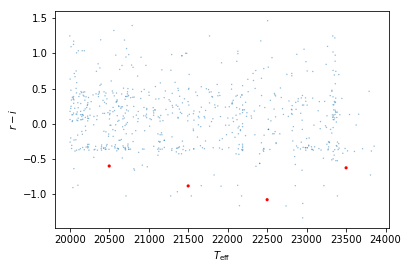

In [89]:
#PLT
plt.scatter(data_final[teff], data_final[color1]-data_final[color2], s=2, edgecolors='None', alpha=0.5)
plt.scatter(int_teff, int_color, c='r', edgecolors='None', s=10)

plt.xlabel('$T_\mathrm{eff}$'); plt.ylabel(ylabel)
#plt.ylim(-2,4)
#plt.scatter(BBFrame_fil['Teff'],BBFrame_fil['J-H'],s=10)
plt.savefig(savename,dpi=200)
plt.show()